<a href="https://colab.research.google.com/github/w1767/MSc-project/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[*********************100%***********************]  1 of 1 completed


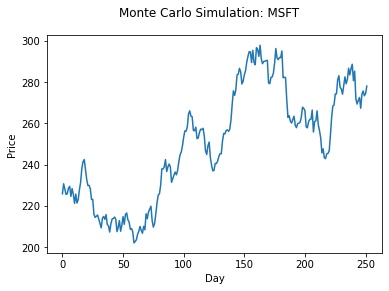

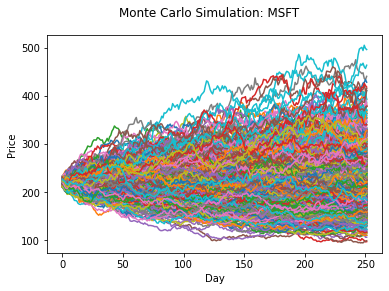

Expected price:  221.71
Quantile (5%):  144.2587788744519
Quantile (95%):  329.16230851052245


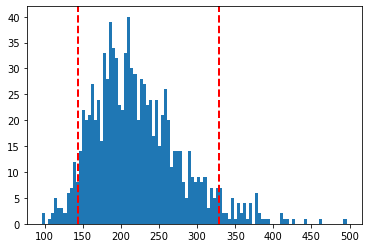

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 18 22:55:16 2021

@author: Teo Bee Guan
"""
!pip install yfinance
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

start = dt.datetime(2011, 1, 1)
end = dt.datetime(2021, 1, 1)

stock_data = yf.download('MSFT', start, end)

returns = stock_data['Adj Close'].pct_change()
daily_vol = returns.std()

T = 252
count = 0
price_list = []
last_price = stock_data['Adj Close'][-1]

price = last_price * (1 + np.random.normal(0, daily_vol))
price_list.append(price)

for y in range(T):
    if count == 251:
        break
    price = price_list[count]* (1 + np.random.normal(0, daily_vol))
    price_list.append(price)
    count += 1

fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: MSFT")
plt.plot(price_list)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()


NUM_SIMULATIONS =  1000
df = pd.DataFrame()
last_price_list = []
for x in range(NUM_SIMULATIONS):
    count = 0
    price_list = []
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_list.append(price)
    
    for y in range(T):
        if count == 251:
            break
        price = price_list[count]* (1 + np.random.normal(0, daily_vol))
        price_list.append(price)
        count += 1
        
    df[x] = price_list
    last_price_list.append(price_list[-1])
        
fig = plt.figure()
fig.suptitle("Monte Carlo Simulation: MSFT")
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

print("Expected price: ", round(np.mean(last_price_list),2))
print("Quantile (5%): ",np.percentile(last_price_list,5))
print("Quantile (95%): ",np.percentile(last_price_list,95))

plt.hist(last_price_list,bins=100)
plt.axvline(np.percentile(last_price_list,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(last_price_list,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

